<a href="https://colab.research.google.com/github/Evelyn199627/EERR/blob/main/Practica_EERR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de Resultados en Python

## Librerias

In [254]:
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

In [255]:
url = 'https://docs.google.com/spreadsheets/d/18jd6r6zcM1ZWR29HU70vLmKoYDid9vW4/edit?usp=drive_link&ouid=108282388871358816657&rtpof=true&sd=true'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_excel(url,skiprows=5)

In [256]:
df.shape

(119, 23)

In [257]:
df.head()

,Grupo,Subgrupo,Mes,DICIEMBRE 2021,ENERO 2022,FEBRERO 2022,MARZO 2022,ABRIL 2022,MAYO 2022,JUNIO 2022,...,OCTUBRE 2022,NOVIEMBRE 2022,DICIEMBRE 2022,ENERO 2023,FEBRERO 2023,MARZO 2023,ABRIL 2023,MAYO 2023,JUNIO 2023,JULIO 2023
0,VENTAS,VENTAS,VENTAS,9.036297e+09,7.745191e+09,7.507286e+09,9.508367e+09,9.464021e+09,1.043916e+10,1.173276e+10,...,1.582472e+10,1.837086e+10,1.636626e+10,1.594371e+10,2.056218e+10,2.133490e+10,2.731740e+10,2.965289e+10,3.425163e+10,3.764448e+10
1,COSTO DE VENTAS,COSTO DE VENTAS,COSTO DE VENTAS,-6.310717e+09,-5.029592e+09,-4.883325e+09,-6.656944e+09,-6.120993e+09,-6.800011e+09,-8.351344e+09,...,-1.043641e+10,-1.242194e+10,-1.042412e+10,-1.021249e+10,-1.418001e+10,-1.369987e+10,-1.874133e+10,-1.900473e+10,-2.165625e+10,-2.484846e+10
2,MARGEN,MARGEN,MARGEN,2.725580e+09,2.715599e+09,2.623961e+09,2.851423e+09,3.343028e+09,3.639151e+09,3.381412e+09,...,5.388316e+09,5.948917e+09,5.942136e+09,5.731221e+09,6.382172e+09,7.635025e+09,8.576067e+09,1.064816e+10,1.259538e+10,1.279602e+10
3,BONIFICACIONES,BONIFICACIONES POR ACTIVIDADES COMERCIALES,BONIFICACIONES POR ACTIVIDADES COMERCIALES,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
4,NaN,OTRAS BONIFICACIONES,OTRAS BONIFICACIONES,1.002950e+09,6.378860e+08,6.445780e+08,1.232176e+09,7.947739e+08,1.006853e+09,1.697694e+09,...,1.637657e+09,1.803306e+09,1.446651e+09,1.451879e+09,2.696195e+09,1.951196e+09,3.604539e+09,2.679972e+09,3.208525e+09,4.734342e+09


## Preprocesamiento

### Eliminación de totales y subtotales

In [258]:
lista = []
for i in df.Mes:
  if i.startswith("Total"):
    lista.append("Total")
  elif i.startswith("MARGEN"):
    lista.append("Total")
  elif i.startswith("CONTRIBUCION MG BRUTA"):
    lista.append("Total")
  elif i.startswith("MARGEN COMERCIAL"):
    lista.append("Total")
  elif i.startswith("RESULTADO DE LA OPERACIÓN DE LOCALES"):
    lista.append("Total")
  elif i.startswith("E.B.I.T.D.A."):
    lista.append("Total")
  elif i.startswith("RESULTADO ANTES DE IMPUESTO A LA GANANCIAS"):
    lista.append("Total")
  elif i.startswith("RESULTADO FINAL"):
    lista.append("Total")
  else:
    lista.append("Ok")

In [259]:
df_m = df
df_m['Filtro'] = lista

In [260]:
df_m.head()

,Grupo,Subgrupo,Mes,DICIEMBRE 2021,ENERO 2022,FEBRERO 2022,MARZO 2022,ABRIL 2022,MAYO 2022,JUNIO 2022,...,NOVIEMBRE 2022,DICIEMBRE 2022,ENERO 2023,FEBRERO 2023,MARZO 2023,ABRIL 2023,MAYO 2023,JUNIO 2023,JULIO 2023,Filtro
0,VENTAS,VENTAS,VENTAS,9.036297e+09,7.745191e+09,7.507286e+09,9.508367e+09,9.464021e+09,1.043916e+10,1.173276e+10,...,1.837086e+10,1.636626e+10,1.594371e+10,2.056218e+10,2.133490e+10,2.731740e+10,2.965289e+10,3.425163e+10,3.764448e+10,Ok
1,COSTO DE VENTAS,COSTO DE VENTAS,COSTO DE VENTAS,-6.310717e+09,-5.029592e+09,-4.883325e+09,-6.656944e+09,-6.120993e+09,-6.800011e+09,-8.351344e+09,...,-1.242194e+10,-1.042412e+10,-1.021249e+10,-1.418001e+10,-1.369987e+10,-1.874133e+10,-1.900473e+10,-2.165625e+10,-2.484846e+10,Ok
2,MARGEN,MARGEN,MARGEN,2.725580e+09,2.715599e+09,2.623961e+09,2.851423e+09,3.343028e+09,3.639151e+09,3.381412e+09,...,5.948917e+09,5.942136e+09,5.731221e+09,6.382172e+09,7.635025e+09,8.576067e+09,1.064816e+10,1.259538e+10,1.279602e+10,Total
3,BONIFICACIONES,BONIFICACIONES POR ACTIVIDADES COMERCIALES,BONIFICACIONES POR ACTIVIDADES COMERCIALES,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,Ok
4,NaN,OTRAS BONIFICACIONES,OTRAS BONIFICACIONES,1.002950e+09,6.378860e+08,6.445780e+08,1.232176e+09,7.947739e+08,1.006853e+09,1.697694e+09,...,1.803306e+09,1.446651e+09,1.451879e+09,2.696195e+09,1.951196e+09,3.604539e+09,2.679972e+09,3.208525e+09,4.734342e+09,Ok


In [261]:
df_m = df_m[ df_m.Filtro == "Ok" ]

In [262]:
df_m.drop(columns = ["Mes", "Grupo","Filtro"],inplace=True)

<ipython-input-262-35a4fe0ee0d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m.drop(columns = ["Mes", "Grupo","Filtro"],inplace=True)


### Agrupación por Subgrupo

In [263]:
df1 = df_m.groupby(['Subgrupo'], as_index=False).agg({'DICIEMBRE 2021': 'sum','ENERO 2022': 'sum','FEBRERO 2022': 'sum','MARZO 2022': 'sum','ABRIL 2022': 'sum','MAYO 2022': 'sum','JUNIO 2022': 'sum','JULIO 2022': 'sum','AGOSTO 2022': 'sum','SEPTIEMBRE 2022': 'sum','OCTUBRE 2022': 'sum','NOVIEMBRE 2022': 'sum','DICIEMBRE 2022': 'sum','ENERO 2023': 'sum','FEBRERO 2023': 'sum','MARZO 2023': 'sum','ABRIL 2023': 'sum','MAYO 2023': 'sum','JUNIO 2023': 'sum','JULIO 2023': 'sum'})

In [264]:
df_pivot = pd.melt(df1, id_vars = ["Subgrupo"], value_vars =['DICIEMBRE 2021', 'ENERO 2022', 'FEBRERO 2022', 'MARZO 2022',
       'ABRIL 2022', 'MAYO 2022', 'JUNIO 2022', 'JULIO 2022', 'AGOSTO 2022',
       'SEPTIEMBRE 2022', 'OCTUBRE 2022', 'NOVIEMBRE 2022', 'DICIEMBRE 2022',
       'ENERO 2023', 'FEBRERO 2023', 'MARZO 2023', 'ABRIL 2023', 'MAYO 2023',
       'JUNIO 2023', 'JULIO 2023'],value_name = 'Saldos',var_name = 'Mes')
df_pivot.head()

,Subgrupo,Mes,Saldos
0,"ABL, EXPENSAS Y AGUAS",DICIEMBRE 2021,-9.360838e+06
1,AJUSTES DE INVENTARIO,DICIEMBRE 2021,-6.922159e+07
2,ALQUILER,DICIEMBRE 2021,-2.318474e+08
3,ALQUILERES,DICIEMBRE 2021,-8.133843e+06
4,AMORTIZACIONES,DICIEMBRE 2021,-3.683777e+07


In [265]:
df_pivot.dtypes

Subgrupo     object
Mes          object
Saldos      float64
dtype: object

In [266]:
df_pivot['Saldos'] = abs(df_pivot['Saldos'])

In [267]:
df_pivot.head()

,Subgrupo,Mes,Saldos
0,"ABL, EXPENSAS Y AGUAS",DICIEMBRE 2021,9.360838e+06
1,AJUSTES DE INVENTARIO,DICIEMBRE 2021,6.922159e+07
2,ALQUILER,DICIEMBRE 2021,2.318474e+08
3,ALQUILERES,DICIEMBRE 2021,8.133843e+06
4,AMORTIZACIONES,DICIEMBRE 2021,3.683777e+07


### Marca gastos/Ingresos

In [268]:
def determinar_tipo(Saldos):
    if Saldos < 0:
        return 'Egreso'
    else:
        return 'Ingreso'

In [269]:
df_pivot['Ingreso/Egreso'] = df_pivot['Saldos'].apply(determinar_tipo)

### Wide table

In [270]:
wide = df_pivot.pivot(index='Mes', columns='Subgrupo', values='Saldos')

In [282]:
wide.head()

Subgrupo,Mes,"ABL, EXPENSAS Y AGUAS",AJUSTES DE INVENTARIO,ALQUILER,ALQUILERES,AMORTIZACIONES,BONIFICACIONES POR ACTIVIDADES COMERCIALES,COSTO DE VENTAS,COSTO PERSONAL,COSTOS DE TRANSPORTE Y FLETE,...,PUBLICIDAD Y PROMOCIONES,RESULTADO DE LA OPERACION DE LOCALES,RESULTADO FINANCIEROS - (GANANCIA NETA),REVALUO INVENTARIO,RSE,SEGURIDAD,TRANSPORTE DE VALORES,VENTAS,fecha,MARGEN_UTILIDAD
3,DICIEMBRE 2021,9360837.82,69221594.09,2.318474e+08,8133842.71,36837766.13,0.0,6.310717e+09,1.278409e+09,58483645.33,...,52149904.54,8.528563e+08,4.200671e+07,1.389683e+08,2295354.20,43673872.42,11720900.51,9.036297e+09,2021-12-01,30.162579
5,ENERO 2022,12910091.11,39973184.26,2.288227e+08,8428403.51,39043923.71,0.0,5.029592e+09,1.208835e+09,46700955.95,...,27311452.58,7.299477e+08,4.230435e+07,2.224734e+08,61407.89,45047726.41,12023878.15,7.745191e+09,2022-01-01,35.061743
7,FEBRERO 2022,14590496.81,54800276.02,2.301220e+08,8811875.11,39629421.33,0.0,4.883325e+09,1.223627e+09,52468501.50,...,33477397.27,7.687242e+08,4.949629e+07,3.832250e+08,1656601.01,47358641.46,12362523.21,7.507286e+09,2022-02-01,34.952193
13,MARZO 2022,15099904.25,56357671.44,2.624846e+08,8910787.61,42026641.31,0.0,6.656944e+09,1.295640e+09,63838596.30,...,61597352.67,1.180390e+09,5.404108e+07,4.066818e+08,1525630.05,46067238.49,9831793.29,9.508367e+09,2022-03-01,29.988568
0,ABRIL 2022,14808991.74,80126375.63,2.682222e+08,9468524.40,43703646.60,0.0,6.120993e+09,1.548044e+09,56239960.68,...,94777807.66,8.607282e+08,1.541021e+08,4.527908e+08,190439.22,47643831.63,16421455.26,9.464021e+09,2022-04-01,35.323550


In [272]:
wide['fecha'] = wide.index

In [273]:
wide.reset_index(inplace=True)

In [274]:
wide['fecha'] = wide['fecha'].str.replace("DICIEMBRE 2021","12-2021")
wide['fecha'] = wide['fecha'].str.replace("ENERO 2022","01-2022")
wide['fecha'] = wide['fecha'].str.replace("FEBRERO 2022","02-2022")
wide['fecha'] = wide['fecha'].str.replace("MARZO 2022","03-2022")
wide['fecha'] = wide['fecha'].str.replace("ABRIL 2022","04-2022")
wide['fecha'] = wide['fecha'].str.replace("MAYO 2022","05-2022")
wide['fecha'] = wide['fecha'].str.replace("JUNIO 2022","06-2022")
wide['fecha'] = wide['fecha'].str.replace("JULIO 2022","07-2022")
wide['fecha'] = wide['fecha'].str.replace("AGOSTO 2022","08-2022")
wide['fecha'] = wide['fecha'].str.replace("SEPTIEMBRE 2022","09-2022")
wide['fecha'] = wide['fecha'].str.replace("OCTUBRE 2022","10-2022")
wide['fecha'] = wide['fecha'].str.replace("NOVIEMBRE 2022","11-2022")
wide['fecha'] = wide['fecha'].str.replace("DICIEMBRE 2022","12-2022")
wide['fecha'] = wide['fecha'].str.replace("ENERO 2023","01-2023")
wide['fecha'] = wide['fecha'].str.replace("FEBRERO 2023","02-2023")
wide['fecha'] = wide['fecha'].str.replace("MARZO 2023","03-2023")
wide['fecha'] = wide['fecha'].str.replace("ABRIL 2023","04-2023")
wide['fecha'] = wide['fecha'].str.replace("MAYO 2023","05-2023")
wide['fecha'] = wide['fecha'].str.replace("JUNIO 2023","06-2023")
wide['fecha'] = wide['fecha'].str.replace("JULIO 2023","07-2023")

In [275]:
wide['fecha'] = pd.to_datetime(wide['fecha'])

In [276]:
wide.sort_values(by = "fecha", inplace =True)

## Graficos

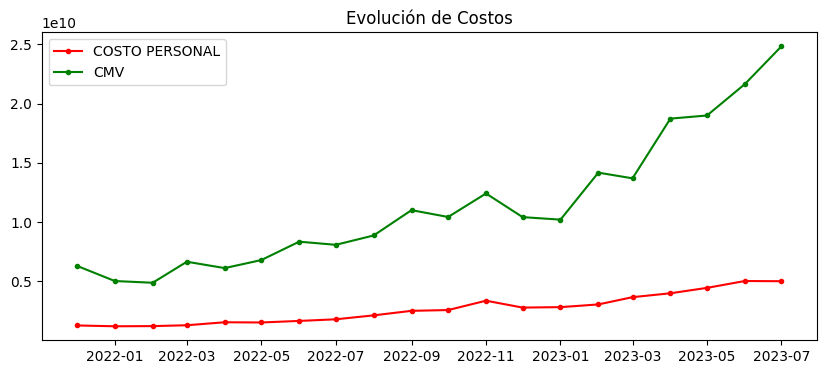

In [277]:
plt.figure(figsize = (10,4))
plt.plot(wide['fecha'], wide['COSTO PERSONAL'], label = 'COSTO PERSONAL', marker='.', color ="red")
plt.plot(wide['fecha'], wide['COSTO DE VENTAS'], label = 'CMV', marker='.', color ="green")
plt.title('Evolución de Costos')
plt.legend(loc='upper left', bbox_to_anchor=(1, 20))
plt.legend()
plt.show()

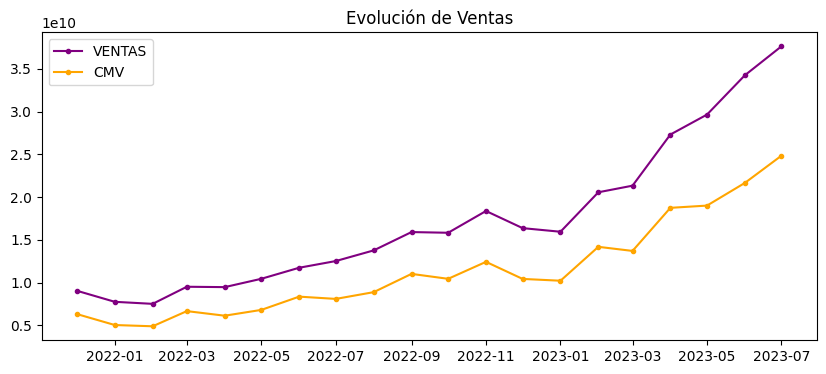

In [286]:
plt.figure(figsize = (10,4))
plt.plot(wide['fecha'], wide['VENTAS'], label = 'VENTAS', marker='.', color = "purple")
plt.plot(wide['fecha'], wide['COSTO DE VENTAS'], label = 'CMV', marker='.', color ="orange")
plt.title('Evolución de Ventas')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.legend()
plt.show()

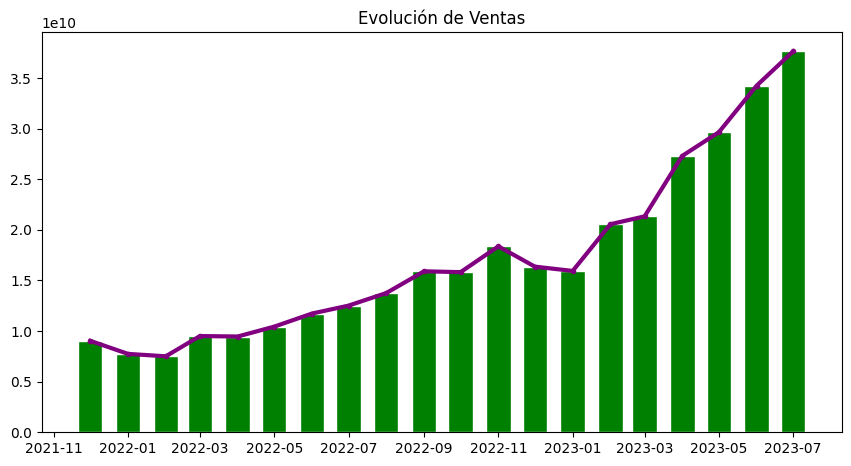

In [290]:
fig = plt.figure(figsize= (8,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(wide['fecha'], wide['VENTAS'], label = 'VENTAS', width = 20, edgecolor = "white", color = "green")
plt.plot(wide['fecha'], wide['VENTAS'], label = 'VENTAS', marker='.', color = "purple", linewidth = 3)
plt.title('Evolución de Ventas')
plt.show()

## Indicadores

### Margen de ventas

In [280]:
wide["MARGEN_UTILIDAD"] = ((wide['VENTAS']- wide['COSTO DE VENTAS']) / wide['VENTAS'])*100

In [281]:
MG = (wide['VENTAS'].sum()- wide['COSTO DE VENTAS'].sum()) / wide['VENTAS'].sum()*100
MG

33.962348410060585